# Attribution Simulator

### Comments

BISOGNA FINIRE ACTION CHECK. COME METTO DENTRO IL BALZO DI INFLUENZA??

Il codice ad ora è molto sensibile alla parametrizzazione. Può essere reso più robusto ma vanno definiti dei comportamenti e delle variabili. 

Ad esempio: 
- PROBLEMA: Alzare le probabilita di esposizione rende piu veloce l'aumento di funnel_position, ma spinge TUTTI gli utenti alla conversione. Se il periodo è lungo rischio che convertano tutti. \
  POSSIBILE SOLUZIONE: Ridefinire il calcolo dell'influenza, magari non facendola fissa ma variabile... si aumenterebbe volatilita nel modello ma risultato piu verosimile
  
- PROBLEMA: La gestione del numero di esposizioni rispetto al numero di utenti è delicata. Se il numero di utenti è vicino al numero di esposizioni, allora va in saturazione molto velocemente e tanti utenti convertono. Se invece il numero di esposizioni è troppo basso, diviene difficile ottenere conversioni sufficienti. \
  POSSIBILE SOLUZIONE: Inserire un ulteriore funzione che gestisca multiple esposizioni in tempi ridotti, anche se questo vorrebbe dire aggiungere altri parametri da modellizzare e potenzialmente un eccesso di complicatezza nel codice.
  
  
punti da confermare:
- Funzione per calcolo probabilita esposizione
- Funzione per sconto nel tempo
- tempo medio di risposta: quanto dev'essere?
- comportamento a lungo termine: allungando il tempo prima o poi convertiranno tutti. Risolvo con azzeramento e aumento numero user? In caso con risimulazione target group?
- generazione numero esposizioni da budget

- la risposta ai traffic potrebbe dipendere dall'attuale stato di funnel_position. questo darebbe un incremento maggiore se usata al tempo giusto!



se lo impostassi come MDP, gli stati potrebbero essere le funnel_position degli utenti, ma non sarebbero observable. In piu, sarebbe veramente un MDP? Perche dipende da come ci sono arrivato alle funnel_position se considero che le campagne si influenzano. È anche vero pero che se l'funnel_position è alta verosimilmente so in automatico che le campagne sono state mostrate.
In alternativa, se lo stato al tempo t fosse il totale delle campagne mostrate? anche qui tralascio l'ordine ma si potrebbe stimare l'funnel_position da questo dato... 



### TO DO

Cambia entering_time con il giorno di prima esposizione, non quando viene creato

leggi su limitazioni tecniche insieme ai paper.
limiti: cross-devicing, necessita di piattaforme terze per tracciamento utenti 
info: feature tipiche

# Simulator

### Import Libraries

In [1]:
# Constants
import config.CONSTANTS_SIMULATOR
from config.execution_parameters import *

# Project libraries
import src.plot_and_print_info.plots_and_print_info
from src.plot_and_print_info.plots_and_print_info import *
import src.simulator_package.simulator_functions
from src.simulator_package.simulator_functions import *

# Built in libraries
import numpy as np
import importlib
#import skfda
#from skfda.exploratory.visualization.clustering import (
#    ClusterMembershipLinesPlot,
#    ClusterMembershipPlot,
#    ClusterPlot,
#)
#from skfda.ml.clustering import KMeans


# Set random seed to repeat simulation
random_seed = 0
np.random.seed(random_seed)

In [2]:
# Reload library if you change code
importlib.reload(src.plot_and_print_info.plots_and_print_info)
importlib.reload(src.simulator_package.simulator_functions)
importlib.reload(config.CONSTANTS_SIMULATOR)
from config.CONSTANTS_SIMULATOR import *
from src.plot_and_print_info.plots_and_print_info import *
from src.simulator_package.simulator_functions import *

### Visualize filtering functions

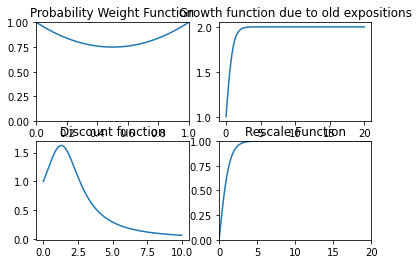

In [3]:
plot_auxiliary_functions()

## Simulate

In [4]:
advertising_campaign = SimulationClass(ANALYSIS_MODE)
advertising_campaign.simulate()

In [6]:
advertising_campaign

KeyboardInterrupt: 

### Plots for inspection

In [ ]:
advertising_campaign.plot_results()

In [ ]:
# Clustered Users funnel_position
fd = skfda.FDataGrid(simulation["funnel_position_history"], range(0,time))
n_clusters = 3
seed = 2

colormap = plt.cm.get_cmap('tab20c')
type_colors = colormap(np.arange(n_clusters) / (n_clusters - 1))
cluster_colors = type_colors[np.array([0, 2, 1])]

kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
kmeans.fit(fd)
print(kmeans.predict(fd))

plt.figure()
for ii in range(n_clusters):
    mean = np.mean(simulation["funnel_position_history"][kmeans.predict(fd)==ii,:], axis=0)
    std = np.std(simulation["funnel_position_history"][kmeans.predict(fd)==ii,:], axis=0)
    plt.plot(range(0,time), mean, label="CLUSTER: "+str(ii))
    plt.fill_between( range(0,time), mean-std, mean+std, alpha=0.3 )
plt.legend()
ClusterPlot(kmeans, fd, cluster_colors=cluster_colors).plot()

